Instalar los paquetes necesarios, ejecutar solo al principio.

In [ ]:
# 📦 Instalar paquetes necesarios
%pip install pandas numpy pyarrow matplotlib seaborn plotly

In [8]:
# 📦 Imports principales para análisis de datos y visualización

# Carga y manipulación de datos
import pandas as pd       # Manipulación y análisis de datos tabulares
import numpy as np        # Operaciones numéricas (opcional, pero útil)

# Lectura de archivos Parquet
import pyarrow.parquet as pq  # Backend recomendado para parquet (alternativa: fastparquet)

# Visualización básica y exploratoria
import matplotlib.pyplot as plt      # Visualizaciones estándar (histogramas, scatter, etc.)
import seaborn as sns                # Visualización estadística avanzada (heatmaps, countplots)

# Visualización avanzada (más adelante)
import plotly.express as px         # Visualizaciones interactivas (incl. Sankey, mapas, etc.)

# Configuración general de visualizaciones
plt.style.use('seaborn-v0_8')        # Estilo visual estándar
# %matplotlib inline                   # Para visualizar directamente en el notebook


Importación de los ficheros parquet

In [9]:
# Fuente de datos directa
# https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Ruta base de trip-data
data_path = "https://d37ci6vzurychx.cloudfront.net/trip-data/"

# Ficheros Parquet para febrero de 2025
yellow_path_2025_02 = data_path + "yellow_tripdata_2025-02.parquet"
green_path_2025_02 = data_path + "green_tripdata_2025-02.parquet"
fhv_path_2025_02 = data_path + "fhv_tripdata_2025-02.parquet"
fhvhv_path_2025_02 = data_path + "fhvhv_tripdata_2025-02.parquet"

# Ficheros Parquet para diciembre de 2025
yellow_path_2024_12 = data_path + "yellow_tripdata_2024-12.parquet"
green_path_2024_12 = data_path + "green_tripdata_2024-12.parquet"
fhv_path_2024_12 = data_path + "fhv_tripdata_2024-12.parquet"
fhvhv_path_2024_12 = data_path + "fhvhv_tripdata_2024-12.parquet"



Carga de los ficheros Parquet en Datasets de Febrero 2025

In [10]:
# Cargamos cada fichero Parquet de Febrero 2025
yellow_df_2025_02 = pd.read_parquet(yellow_path_2025_02, engine="pyarrow")
green_df_2025_02 = pd.read_parquet(green_path_2025_02, engine="pyarrow")
fhv_df_2025_02 = pd.read_parquet(fhv_path_2025_02, engine="pyarrow")
fhvhv_df_2025_02 = pd.read_parquet(fhvhv_path_2025_02, engine="pyarrow")


Verificación de la carga de los datasets de Febrero 2025

In [16]:
# Mostramos el número de filas y columnas de cada dataset de Febrero 2025
for name, df in zip(["Yellow", "Green", "FHV", "FHVHV"],
                    [yellow_df_2025_02, green_df_2025_02, fhv_df_2025_02, fhvhv_df_2025_02]):
    print(f"{name} Cabs February 2025: {df.shape[0]:,} filas, {df.shape[1]} columnas")

Yellow Cabs February 2025: 3,577,543 filas, 20 columnas
Green Cabs February 2025: 46,621 filas, 21 columnas
FHV Cabs February 2025: 1,578,722 filas, 7 columnas
FHVHV Cabs February 2025: 19,339,461 filas, 25 columnas


Carga de los ficheros Parquet en Datasets de Diciembre 2024

In [13]:
# Cargamos cada fichero Parquet de Diciembre 2024
yellow_df_2024_12 = pd.read_parquet(yellow_path_2024_12, engine="pyarrow")
green_df_2024_12 = pd.read_parquet(green_path_2024_12, engine="pyarrow")
fhv_df_2024_12 = pd.read_parquet(fhv_path_2024_12, engine="pyarrow")
fhvhv_df_2024_12 = pd.read_parquet(fhvhv_path_2024_12, engine="pyarrow")

Verificación de la carga de los datasets de Diciembre 2025

In [15]:
# Mostramos el número de filas y columnas de cada dataset de Diciembre 2024
for name, df in zip(["Yellow", "Green", "FHV", "FHVHV"],
                    [yellow_df_2024_12, green_df_2024_12, fhv_df_2024_12, fhvhv_df_2024_12]):
    print(f"{name} Cabs December 2024: {df.shape[0]:,} filas, {df.shape[1]} columnas")

Yellow Cabs December 2024: 3,668,371 filas, 19 columnas
Green Cabs December 2024: 53,994 filas, 20 columnas
FHV Cabs December 2024: 1,913,200 filas, 7 columnas
FHVHV Cabs December 2024: 21,068,851 filas, 24 columnas


In [17]:
# Mostrar lista de columnas y sus tipos del dataset Yellow Cabs
yellow_columns_info = pd.DataFrame({
    'Columna': yellow_df_2025_02.columns,
    'Tipo de dato': yellow_df_2025_02.dtypes.astype(str)
})

# Mostrar la tabla
yellow_columns_info


,Columna,Tipo de dato
VendorID,VendorID,int32
tpep_pickup_datetime,tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,tpep_dropoff_datetime,datetime64[us]
passenger_count,passenger_count,float64
trip_distance,trip_distance,float64
RatecodeID,RatecodeID,float64
store_and_fwd_flag,store_and_fwd_flag,object
PULocationID,PULocationID,int32
DOLocationID,DOLocationID,int32
payment_type,payment_type,int64


¿Existen valores aparentemente incorrectos?  Yellow Cabs Febrero 2025

In [21]:
# 🔍 Análisis de calidad de datos en Yellow Cabs (Febrero 2025)

def analizar_valores_invalidos(df):
    resultados = {}

    # 1. Pasajeros: 0 o valores negativos
    resultados['Pasajeros = 0 o negativos'] = df[df['passenger_count'] <= 0].shape[0]

    # 2. Distancias negativas o cero
    resultados['Distancia = 0 o negativa'] = df[df['trip_distance'] <= 0].shape[0]

    # 3. Duración del viaje (dropoff < pickup)
    resultados['Dropoff antes de Pickup'] = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']].shape[0]

    # 4. Duración = 0 (pickup == dropoff)
    resultados['Duración = 0 min'] = df[df['tpep_pickup_datetime'] == df['tpep_dropoff_datetime']].shape[0]

    # 5. Total_amount negativo o cero
    if 'total_amount' in df.columns:
        resultados['Total = 0 o negativo'] = df[df['total_amount'] <= 0].shape[0]

    # 6. Ubicaciones nulas o fuera de rango (ID de zona entre 1 y 263 según TLC)
    resultados['PULocationID inválido'] = df[~df['PULocationID'].between(1, 263)].shape[0]
    resultados['DOLocationID inválido'] = df[~df['DOLocationID'].between(1, 263)].shape[0]

    return pd.DataFrame.from_dict(resultados, orient='index', columns=['Nº de registros'])

# Ejecutamos el análisis en el dataset de Yellow Cabs
analisis_yellow = analizar_valores_invalidos(yellow_df_2025_02)
analisis_yellow


,Nº de registros
Pasajeros = 0 o negativos,21751
Distancia = 0 o negativa,99771
Dropoff antes de Pickup,93
Duración = 0 min,5071
Total = 0 o negativo,55621
PULocationID inválido,8635
DOLocationID inválido,21285


Gráfico combinado para representar de forma clara y visual los outliers en las variables más propensas a errores

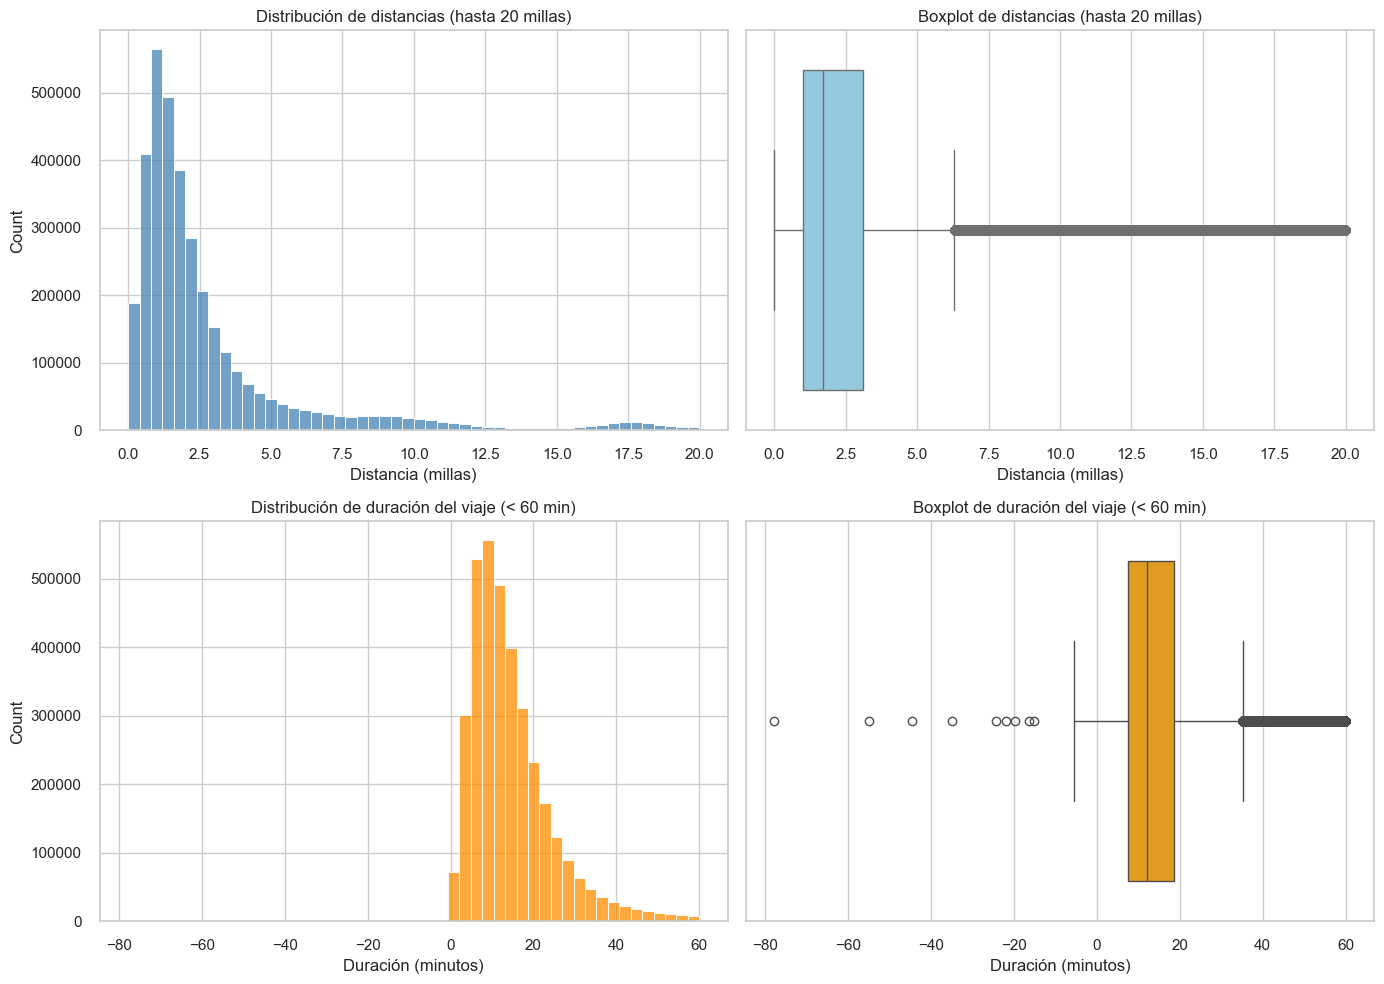

In [23]:
# Configuración general del estilo
sns.set(style="whitegrid")

# Figura con dos subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma de distancias (máx. 20 millas para enfocar la visualización)
sns.histplot(yellow_df_2025_02[yellow_df_2025_02["trip_distance"] < 20]["trip_distance"], 
             bins=50, kde=False, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title("Distribución de distancias (hasta 20 millas)")
axs[0, 0].set_xlabel("Distancia (millas)")

# 2. Boxplot de distancias
sns.boxplot(x=yellow_df_2025_02[yellow_df_2025_02["trip_distance"] < 20]["trip_distance"], 
            ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title("Boxplot de distancias (hasta 20 millas)")
axs[0, 1].set_xlabel("Distancia (millas)")

# 3. Histograma de duración del trayecto (en minutos)
yellow_df_2025_02["trip_duration_min"] = (yellow_df_2025_02["tpep_dropoff_datetime"] - yellow_df_2025_02["tpep_pickup_datetime"]).dt.total_seconds() / 60
sns.histplot(yellow_df_2025_02[yellow_df_2025_02["trip_duration_min"] < 60]["trip_duration_min"], 
             bins=50, kde=False, ax=axs[1, 0], color='darkorange')
axs[1, 0].set_title("Distribución de duración del viaje (< 60 min)")
axs[1, 0].set_xlabel("Duración (minutos)")

# 4. Boxplot de duración
sns.boxplot(x=yellow_df_2025_02[yellow_df_2025_02["trip_duration_min"] < 60]["trip_duration_min"], 
            ax=axs[1, 1], color='orange')
axs[1, 1].set_title("Boxplot de duración del viaje (< 60 min)")
axs[1, 1].set_xlabel("Duración (minutos)")

# Ajustar espacio
plt.tight_layout()
plt.show()


Visualización de trayectos entre zonas

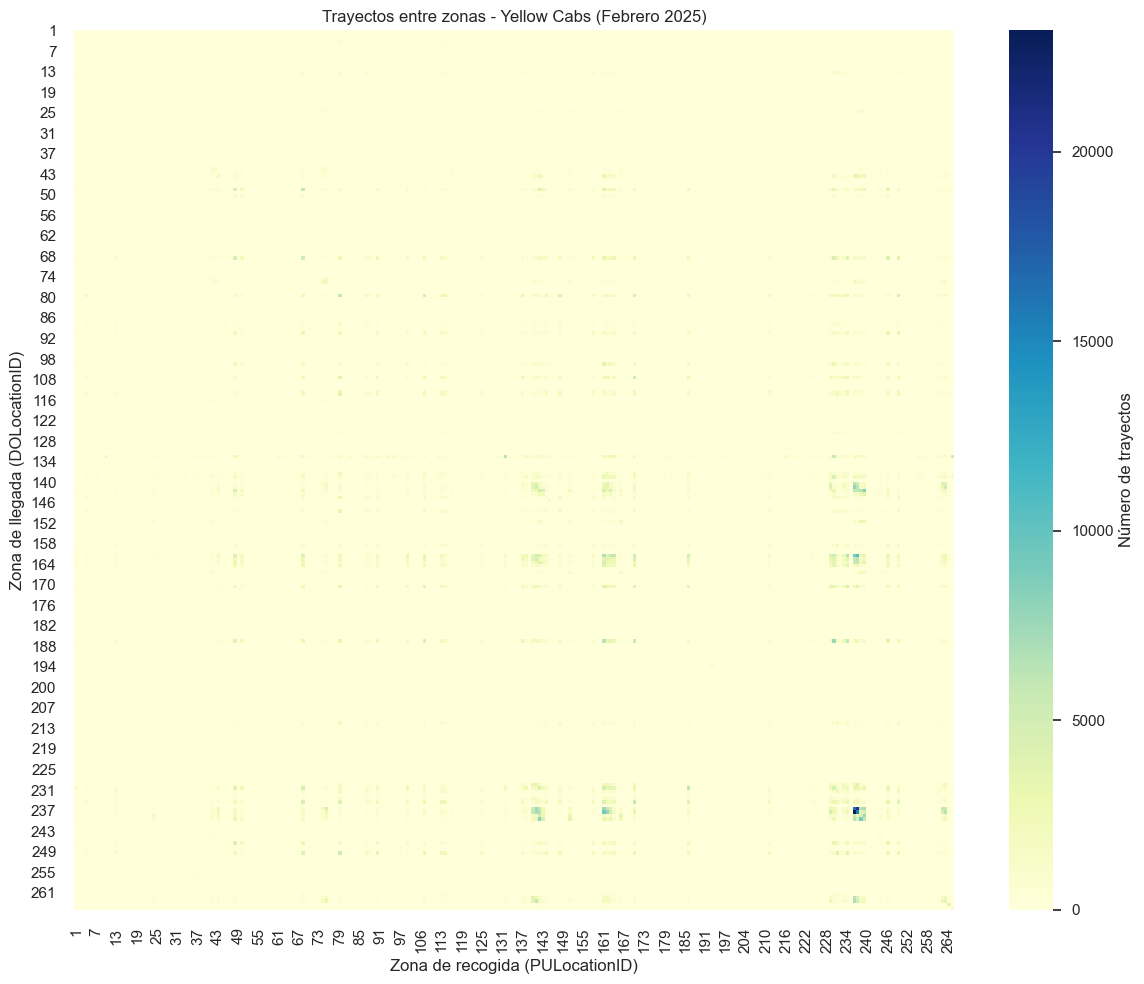

In [25]:
# Agrupamos y contamos trayectos por combinación de zonas
zonas_yellow = yellow_df_2025_02.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')

# Plot con seaborn
plt.figure(figsize=(12, 10))
pivot_yellow = zonas_yellow.pivot(index='PULocationID', columns='DOLocationID', values='count').fillna(0)

sns.heatmap(pivot_yellow, cmap="YlGnBu", cbar_kws={'label': 'Número de trayectos'})
plt.title('Trayectos entre zonas - Yellow Cabs (Febrero 2025)')
plt.xlabel('Zona de recogida (PULocationID)')
plt.ylabel('Zona de llegada (DOLocationID)')
plt.tight_layout()
plt.show()
